# Data preprocessing

## Distribution of the dataset

After exploring the dataset and identifying the issues related to the problem at hand, we proceed to adjust it before moving forward with the classification model application.

The dataset provides the necessary information to consider a classification into three different categories.


- Patients without any pathology.
- Patients with bacterial pneumonia.
- Patients with viral pneumonia.

The original data set organizes the observations into two folders, differentiating between patients with or without pneumonia. To make the most of the information in the data set, the “pneumonia” set was split into “bacterial pneumonia” and “viral pneumonia,” and the observations were moved accordingly to finally have the expected three classes.

In [1]:
import os
from sklearn.model_selection import train_test_split
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path_dir = "../../kaggle/pneumoniaDataset/chest_xray"
train_data_dir = os.path.join( path_dir, "train" )
test_data_dir = os.path.join( path_dir, "test" )

In [3]:
def load_chest_xray_data( data_directory ):
    dirs = [ d for d in os.listdir( data_directory ) 
            if os.path.isdir( os.path.join( data_directory, d ) ) ]
    print( dirs )

    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join( data_directory, d )
        file_names = [ os.path.join( label_dir, f ) 
                        for f in os.listdir( label_dir )
                        if f.endswith(".jpeg") ]
        
        print("Label dir --> " + label_dir )

        for f in file_names:
            images.append( skio.imread(f) )
            labels.append( str(d) )
    
    return images, labels

In [4]:
images, labels = load_chest_xray_data( train_data_dir )
images_test, labels_test = load_chest_xray_data( test_data_dir )

['NORMAL', 'PNEUMONIA_VIRUS', 'PNEUMONIA_BACTERIA']
Label dir --> ../../kaggle/pneumoniaDataset/chest_xray/train/NORMAL
Label dir --> ../../kaggle/pneumoniaDataset/chest_xray/train/PNEUMONIA_VIRUS
Label dir --> ../../kaggle/pneumoniaDataset/chest_xray/train/PNEUMONIA_BACTERIA
['NORMAL', 'PNEUMONIA_VIRUS', 'PNEUMONIA_BACTERIA']
Label dir --> ../../kaggle/pneumoniaDataset/chest_xray/test/NORMAL
Label dir --> ../../kaggle/pneumoniaDataset/chest_xray/test/PNEUMONIA_VIRUS
Label dir --> ../../kaggle/pneumoniaDataset/chest_xray/test/PNEUMONIA_BACTERIA


In [5]:
def count_labels(labels):
    normal = 0
    bacteria = 0
    virus = 0
    total = 0

    for label in labels:
        if label == 'NORMAL':
            normal += 1
        elif label == 'PNEUMONIA_BACTERIA':
            bacteria += 1
        elif label == 'PNEUMONIA_VIRUS':
            virus += 1
        total += 1

    return normal, bacteria, virus, total

def print_labels_result(title, normal, bacteria, virus, total):
    print(f"NUMBER OF IMAGES:")
    print(f" - normal: {normal}")
    print(f" - bacteria: {bacteria}")
    print(f" - virus: {virus}")
    print(f" total: {total}")

# With training data
normal_train, bacteria_train, virus_train, total_train = count_labels(labels)
print_labels_result("TRAINING", normal_train, bacteria_train, virus_train, total_train)

# With testing data
normal_test, bacteria_test, virus_test, total_test = count_labels(labels_test)
print_labels_result("TESTING", normal_test, bacteria_test, virus_test, total_test)


NUMBER OF IMAGES:
 - normal: 1349
 - bacteria: 2538
 - virus: 1345
 total: 5232
NUMBER OF IMAGES:
 - normal: 234
 - bacteria: 242
 - virus: 148
 total: 624


In [7]:
# To convert to a NumPy array
# Training test
np_images = np.array(images, dtype=object)
np_labels = np.array(labels, dtype=object)
# Testing set
np_images_test = np.array(images_test, dtype=object)
np_labels_test = np.array(labels_test, dtype=object)

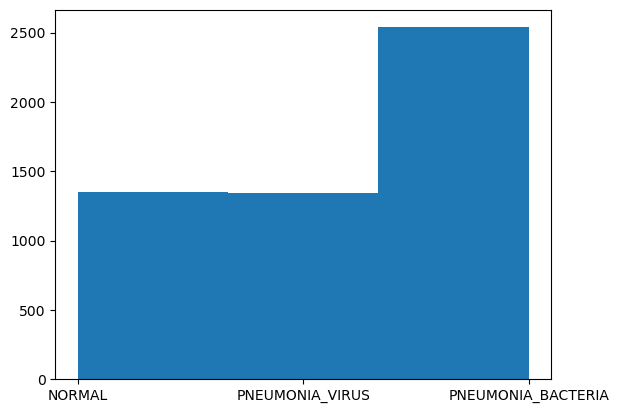

In [11]:
plt.hist(np_labels, len(set(np_labels)))
plt.show()

The division of observations into three classes does not solve the previous imbalance between 'normal' and 'pneumonia', and now shows a clear imbalance towards 'bacterial pneumonia', where approximately twice as many samples are observed as the rest of the possible classifications.

This imbalance can cause the training model to not learn all the features necessary to correctly differentiate between minority classes and resolve some samples to the majority class type due to a higher probability of correct predictions.

At this point we can choose three different paths:
- Complement the classes of the minority groups with another existing group. In many areas, as is the case with Health, it is possible that you are making use of all known data and no other complementary datasets are available.

- Extract observations from the dominant class. While extracting observations helps balance the classes, it could also be counterproductive, as it may result in missing observations with characteristics that could be representative and crucial for the model's representation.

- Balancing the dataset using known data and applying synthetic changes, such as data augmentation. This technique is known as Oversampling.

To balance the data before starting to work on the models, the number of observations in the minority sets will be doubled and data augmentation will be used to apply random changes to the samples. This will synthetically generate new observations, thus leveling the observations in all classes present in the data set.